In [1]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd 
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 11.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [56]:
df = yf.download('AVAX-USD', start='2015-01-01', end='2022-12-31', progress=False)
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-13,4.613968,4.915115,4.481499,4.896294,4.896294,28340
1,2020-07-14,4.909865,5.229564,4.762068,4.986754,4.986754,3957
2,2020-09-22,4.986754,11.463443,4.125380,5.234632,5.234632,288098840
3,2020-09-23,5.321654,5.329310,3.982604,4.118469,4.118469,173091214
4,2020-09-24,3.817925,4.751878,3.539887,4.566561,4.566561,96110964
...,...,...,...,...,...,...,...
827,2022-12-26,11.684330,11.764178,11.580630,11.723856,11.723856,100546246
828,2022-12-27,11.720731,11.780209,11.581322,11.646396,11.646396,130725347
829,2022-12-28,11.646214,11.655287,11.132728,11.202914,11.202914,139487054
830,2022-12-29,11.203087,11.208213,10.702117,10.992695,10.992695,118611566


In [57]:
df = df[['Date','Close']]
df = df.rename(columns={'Date':'ds','Close':'y'})
df.tail(10)

,ds,y
822,2022-12-21,11.696437
823,2022-12-22,11.843431
824,2022-12-23,11.781727
825,2022-12-24,11.680429
826,2022-12-25,11.684593
827,2022-12-26,11.723856
828,2022-12-27,11.646396
829,2022-12-28,11.202914
830,2022-12-29,10.992695
831,2022-12-30,10.870249


In [58]:
df = df[:-1]
df

,ds,y
0,2020-07-13,4.896294
1,2020-07-14,4.986754
2,2020-09-22,5.234632
3,2020-09-23,4.118469
4,2020-09-24,4.566561
...,...,...
826,2022-12-25,11.684593
827,2022-12-26,11.723856
828,2022-12-27,11.646396
829,2022-12-28,11.202914


In [59]:
!pip install NeuralProphet
from neuralprophet import NeuralProphet
from matplotlib import pyplot as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
m = NeuralProphet()
m.fit(df, freq='D', epochs=100)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.759% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.759% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: 

Finding best initial lr:   0%|          | 0/224 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,92.355141,113.963760,0.446293,0.0,0
1,86.678589,107.334953,0.406795,0.0,1
2,78.168022,97.293739,0.349094,0.0,2
3,66.616814,82.741653,0.271396,0.0,3
4,52.115887,64.667229,0.178765,0.0,4
...,...,...,...,...,...
95,5.637564,7.483340,0.002533,0.0,95
96,5.626429,7.462641,0.002523,0.0,96
97,5.620715,7.473560,0.002517,0.0,97
98,5.624613,7.459420,0.002516,0.0,98


In [61]:
future = m.make_future_dataframe(df, periods=120)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.759% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.759% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 52it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-12-30,None,1.596532,-2.723128,4.534518,-0.214858
1,2022-12-31,None,1.385645,-2.965268,4.146303,0.204610
2,2023-01-01,None,0.438498,-3.207409,3.771073,-0.125166
3,2023-01-02,None,-0.289844,-3.449550,3.410916,-0.251210
4,2023-01-03,None,-0.511299,-3.691713,3.067850,0.112564


In [62]:
future.tail()

,ds,y
115,2023-04-24,None
116,2023-04-25,None
117,2023-04-26,None
118,2023-04-27,None
119,2023-04-28,None


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


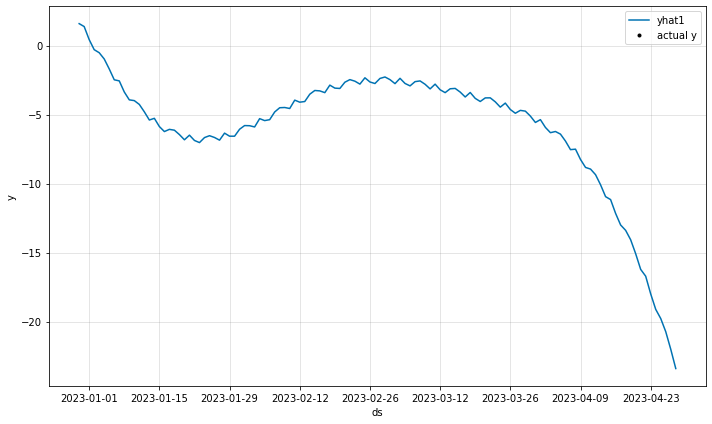

In [63]:
plot1 = m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


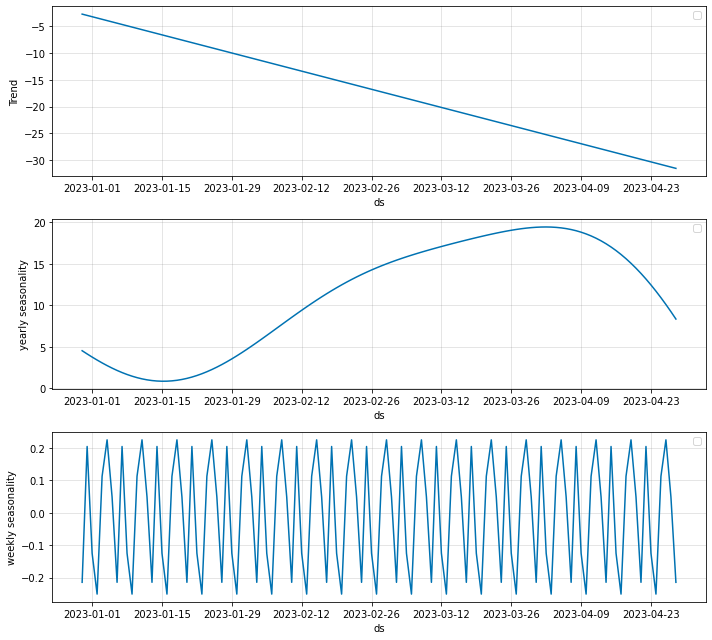

In [64]:
plot2 = m.plot_components(forecast)